<a href="https://colab.research.google.com/github/andrebelem/Oficina_PyGMT/blob/main/00__Demo_Python_Google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testando o PyGMT no Google Colab

Este Jupyter Notebook mostra como instalar e usar o PyGMT no Google Colab.

NOTA: Qualquer alteração será perdida quando o Jupyter lab for fechado. Selecione `Arquivo -> Download` para salvar os notebooks no seu computador ou salve uma cópia no seu google drive.

Para executar as células de código, selecione-as e pressione `Shift + Enter` ou clique no botão "Executar" ► na barra de menu.

Para tutoriais e mais exemplos, visite o site oficial: https://www.pygmt.org

##Instalar PyGMT e suas dependências no Google Colab

Google Colab não possui PyGMT e suas dependências instaladas. Precisamos seguir as instruções abaixo para instalá-los.

Primeiro, precisamos instalar o conda no Google Colab. O processo de instalação é muito simplificado usando o pacote [condacolab](https://github.com/conda-incubator/condacolab).

*Depois que o condacolab terminar a instalação, ele reiniciará o kernel do Python para que as mudanças sejam aplicadas. Isso acontece automaticamente. Assim, você verá uma mensagem dizendo "Sua sessão travou por uma razão desconhecida". Você pode ignorar esta mensagem com segurança!*

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


Agora podemos instalar o PyGMT e suas dependências usando um único comando. A instalação pode levar alguns minutos:

In [ ]:
!mamba install pygmt #<- note que aqui usamos o mamba, mas isso pode ser feito com o conda


Looking for: ['pygmt']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64   1%
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64  10%
conda-forge/noarch     9%[+] 0.3s
conda-forge/linux-64  19%
conda-forge/noarch    30%[+] 0.4s
conda-forge/linux-64  29%
conda-forge/noarch    63%[+] 0.5s
conda-forge/linux-64  33%
conda-forge/noarch    74%[+] 0.6s
conda-forge/linux-64  38%
conda-forge/noarch    85%[+] 0.7s
conda-forge/linux-64  42%
conda-forge/noarch    96%conda-forge/noarch                                
[+] 0.8s
conda-forge/linux-64  52%[+] 0.9s
conda-forge/linux-64  61%[+] 1.0s
conda-forge/linux-64  70%[+] 1.1s
conda-forge/linux-64  75%[+] 1.2s
conda-forge/linux-64  84%[+] 1.3s
conda-forge/linux-64  93%conda-forge/linux-64                              

Pinned packages:
  - python 3.10.*
  - python 3.10.*
  - python_abi 3.10.* *cp310*
  - cuda-version 12.*


Transaction

  Prefix: /usr/local

  Updating specs:

   - pygmt
   - ca-certificates
   - certifi
   - openssl


  Package         

## Carregando o pacote PyGMT

Você pode carregar o PyGMT importando o pacote Python `pygmt`. A maioria dos módulos de processamento GMT estará disponível como funções neste pacote. Os módulos de plotagem são métodos da classe `pygmt.Figure`.


In [ ]:
# Carregue o pacote PyGMT. Isso só precisa ser executado uma vez
import pygmt

## Verifique o ambiente instalado

Antes de começar, vamos primeiro verificar o ambiente atual:

In [ ]:
pygmt.show_versions()

PyGMT information:
  version: v0.12.0
System information:
  python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
  executable: /usr/bin/python3.real
  machine: Linux-6.1.85+-x86_64-with-glibc2.35
Dependency information:
  numpy: 1.25.2
  pandas: 2.2.2
  xarray: 2024.6.0
  netCDF4: 1.6.5
  packaging: 24.1
  contextily: None
  geopandas: 0.13.2
  ipython: None
  rioxarray: None
  ghostscript: 10.03.1
GMT library information:
  binary version: 6.5.0
  cores: 2
  grid layout: rows
  image layout: 
  library path: /usr/local/lib/libgmt.so
  padding: 2
  plugin dir: /usr/local/lib/gmt/plugins
  share dir: /usr/local/share/gmt
  version: 6.5.0


## Exemplo 1

Toda a geração de figuras no PyGMT é feita pela classe `pygmt.Figure`.
Ela possui métodos para adicionar camadas à sua figura, como um mapa base, linhas costeiras, etc. <br>
Começamos uma nova figura criando uma instância de `pygmt.Figure`:


In [ ]:
fig = pygmt.Figure()

Adicionamos elementos à figura usando seus métodos. Por exemplo, vamos adicionar as linhas costeiras globais a um mapa de 15 cm de largura usando a projeção Hammer (**H**).

Nossa figura também terá uma moldura bonita com marcações automáticas.


In [ ]:
fig.coast(region='g', projection='H15c', frame=True, land='lightbrown', water='lightblue')

Você pode ver uma prévia da figura diretamente no Jupyter notebook usando `fig.show()`.

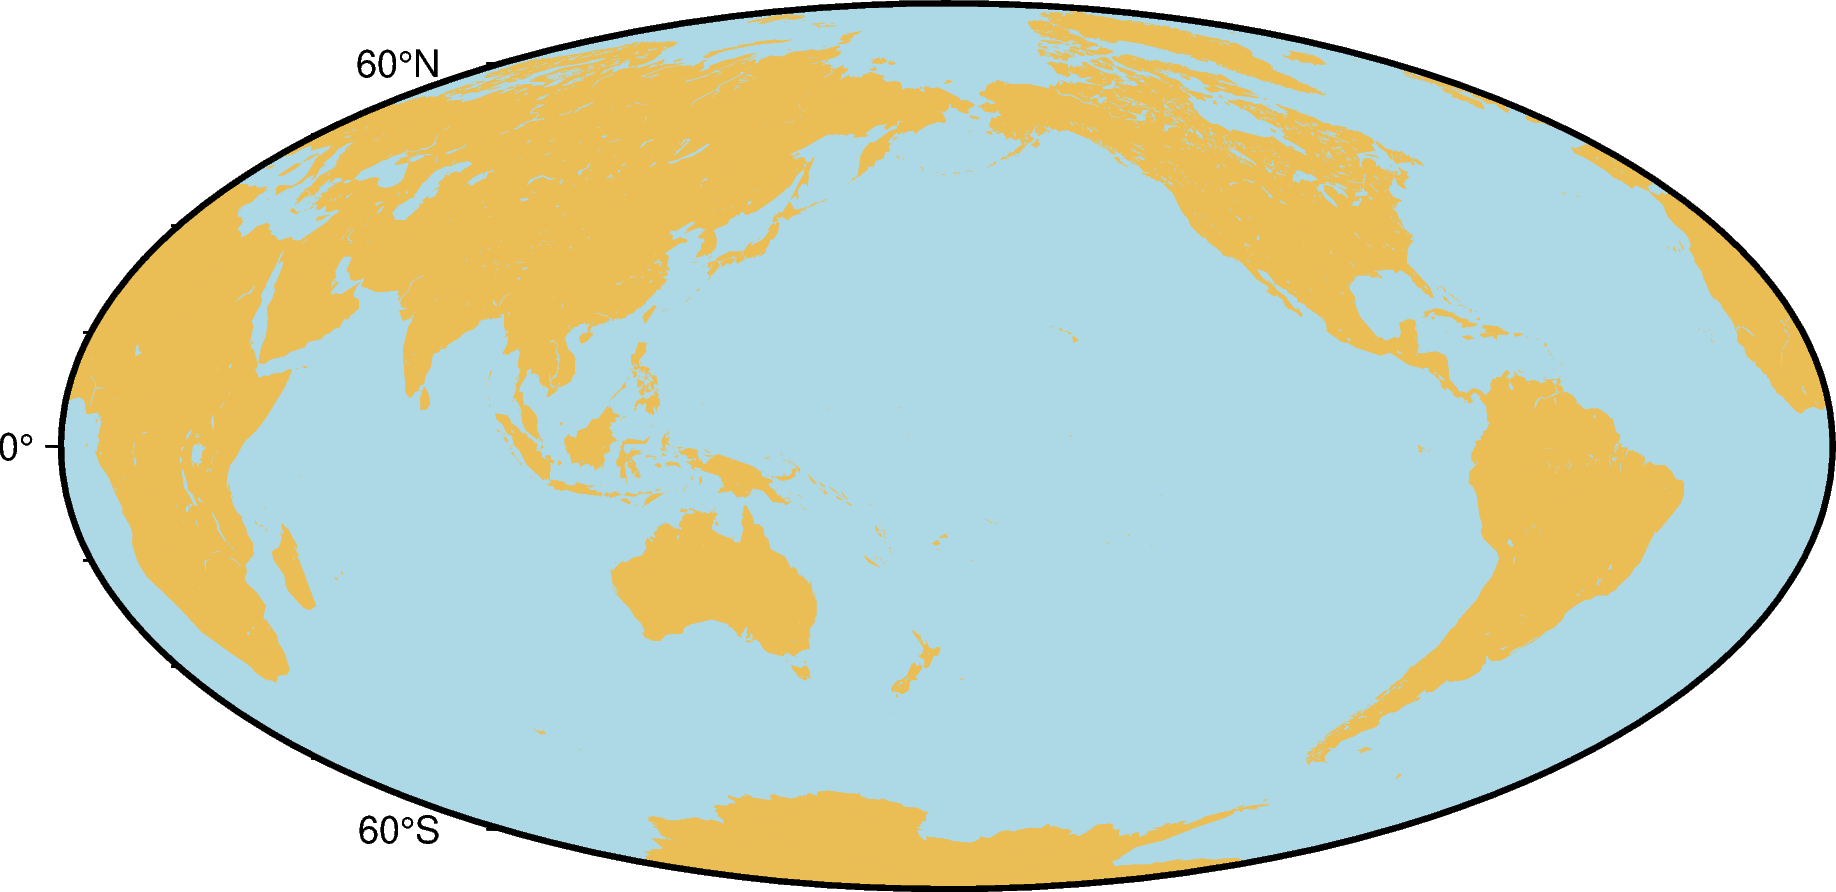

In [ ]:
fig.show()

Você também pode salvar sua figura em vários formatos gráficos (por exemplo, png, pdf, jpg) usando `fig.savefig()`:


In [ ]:
fig.savefig("global.png")

## Exemplo 2

Note que não precisamos colocar cada função em uma linha. Podemos construir um bloco completo de rotinas.

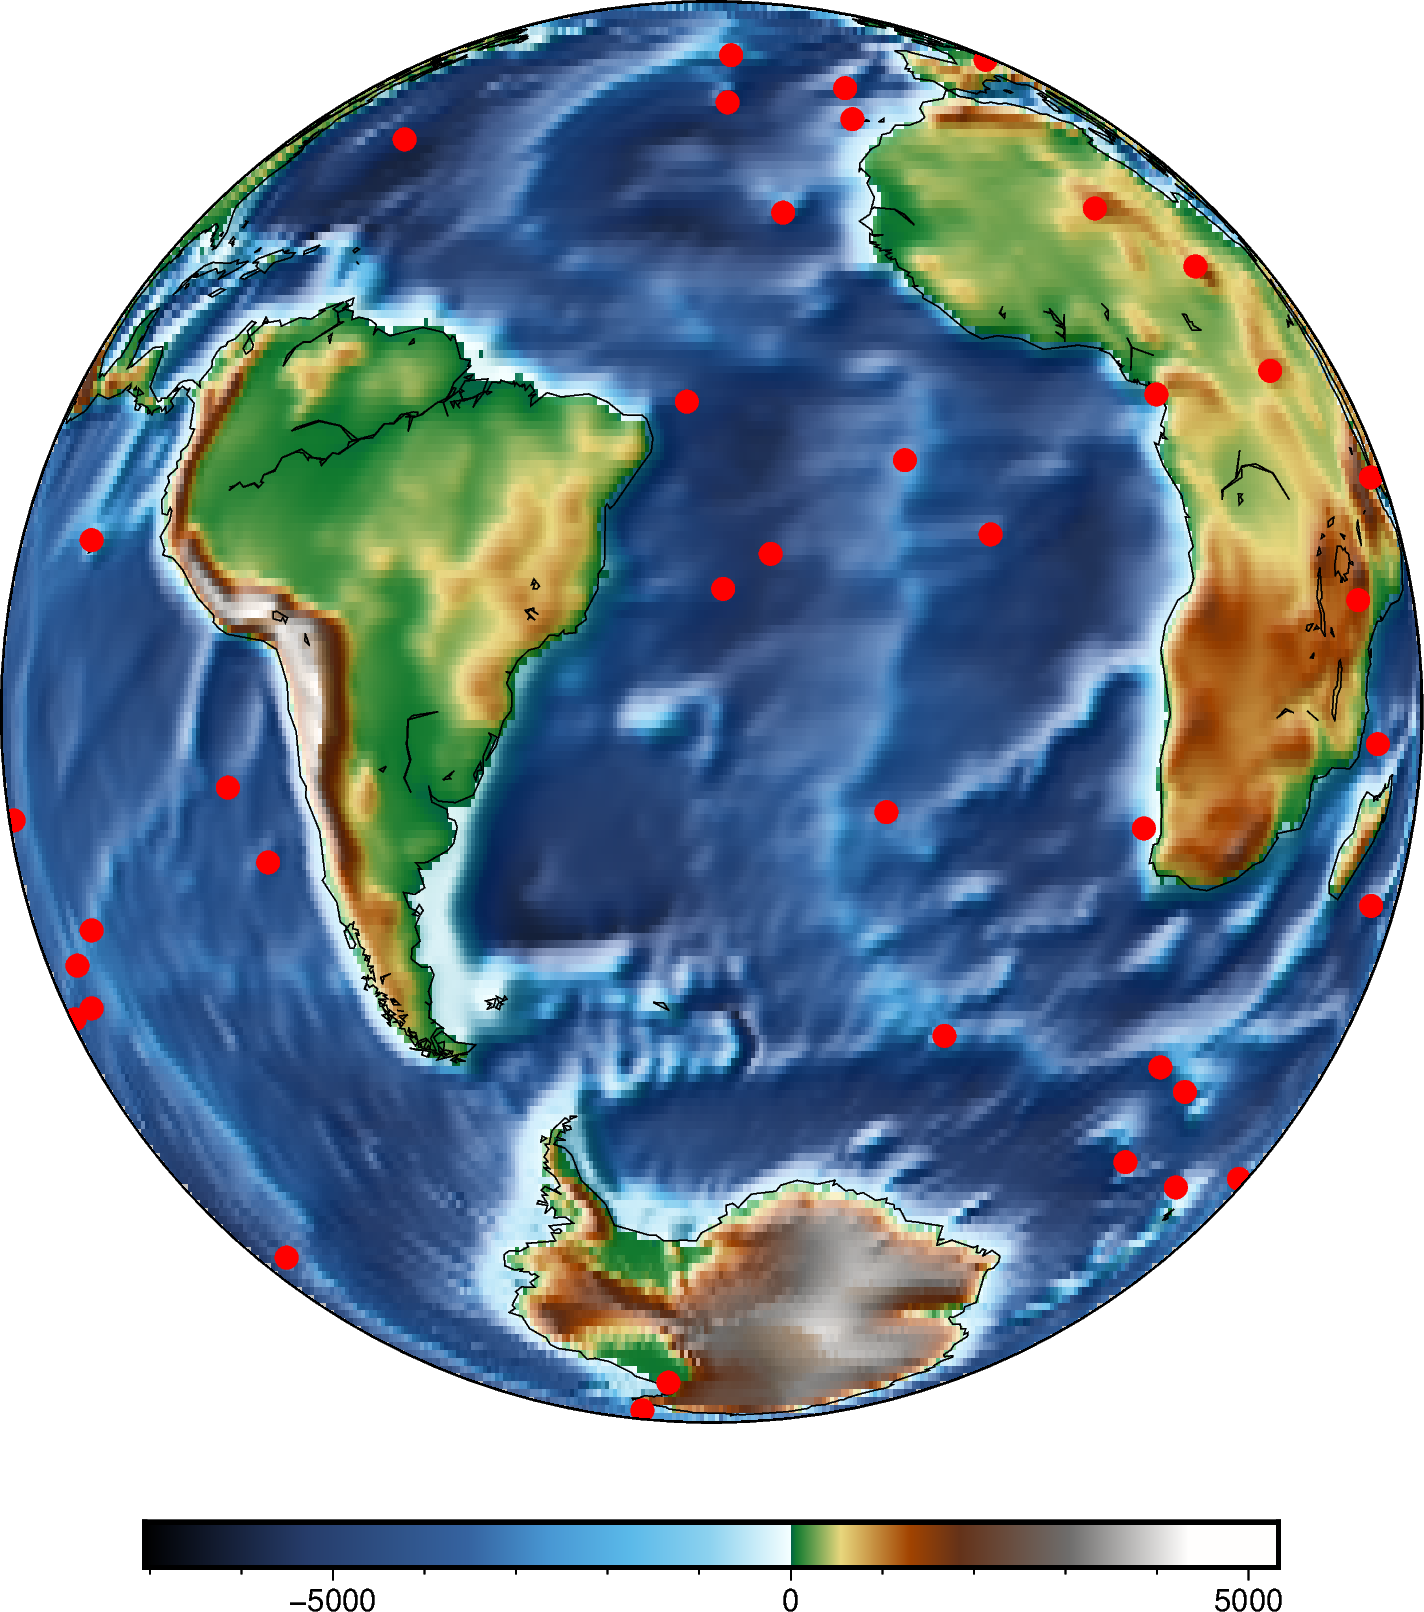

In [ ]:
from pygmt.datasets import load_earth_relief #<-- usa o global relief para topografia

grid = load_earth_relief(resolution='01d', registration='pixel')

fig = pygmt.Figure()
fig.basemap(region='g', projection='G330/-30/12c', frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
fig.coast(resolution='c', shorelines=True, area_thresh=1000)
fig.plot(data='@hotspots.txt', style='c0.2c', fill='red')
fig.colorbar()
fig.show()

## Agora experimente você !

Tente executar diferentes configurações nas células abaixo. Assim você pode ir se acostumando como rodar comandos no google colab.

In [ ]:
fig = pygmt.Figure()
# adicione o seu código aqui
fig.show()